In [1]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time

In [2]:
# load mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/mnist', one_hot=False)
data = mnist.train.images
data = (data * 2) - 1 # norm for tanh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# pick single digit
digit = 4
idx_digit = mnist.train.labels == digit
data = data[idx_digit,]

In [128]:
# params
num_at = 3
noise_z_std = 0.0
#z_dim = [256,64]
z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [153]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [154]:
# train
model.train(data, batch_size=64, num_batches=5000)

Iter [       0] Time [0.1392] loss [0.9311]
Iter [     500] Time [0.7177] loss [0.2902]
Iter [    1000] Time [1.2415] loss [0.2155]
Iter [    1500] Time [1.7642] loss [0.2044]
Iter [    2000] Time [2.2935] loss [0.1898]
Iter [    2500] Time [2.8325] loss [0.1984]
Iter [    3000] Time [3.3686] loss [0.1906]
Iter [    3500] Time [3.9064] loss [0.1965]
Iter [    4000] Time [4.4362] loss [0.1683]
Iter [    4500] Time [4.9817] loss [0.1850]
Iter [    4999] Time [5.5035] loss [0.1849]


In [136]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.1718


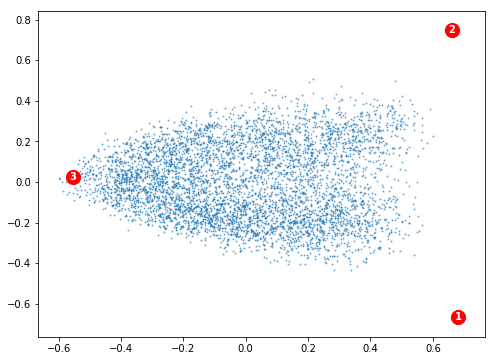

In [137]:
model.plot_at_pca_single(data)

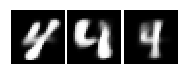

In [138]:
# plot ATs
ats_x = model.get_ats_x()
AAtools.plot_mnist(ats_x)

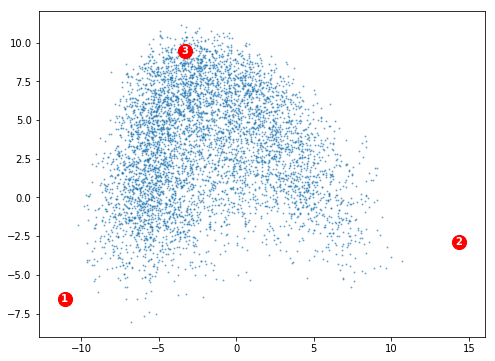

In [139]:
model.plot_pca_ats_data(data)

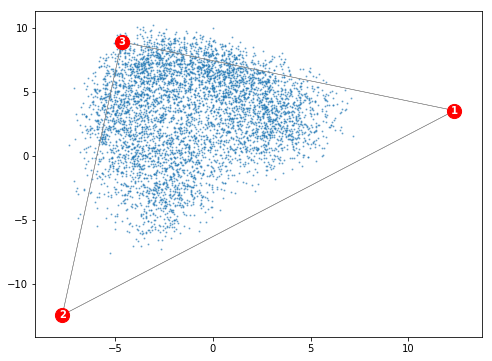

In [140]:
model.plot_at_mds(data)

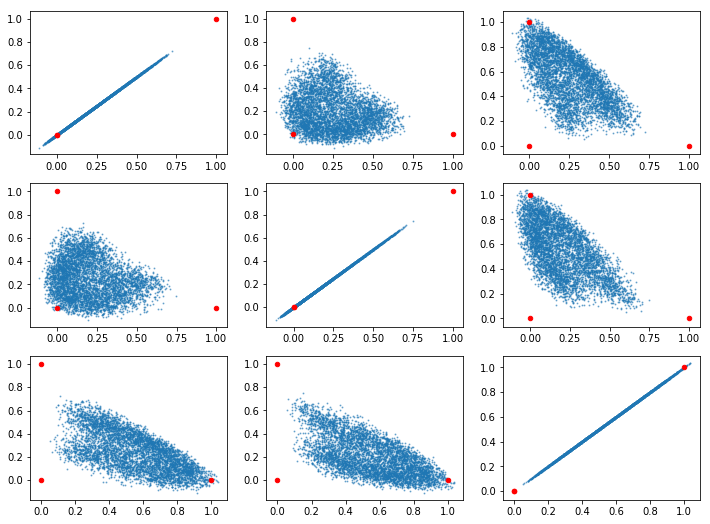

In [141]:
model.plot_at(data)

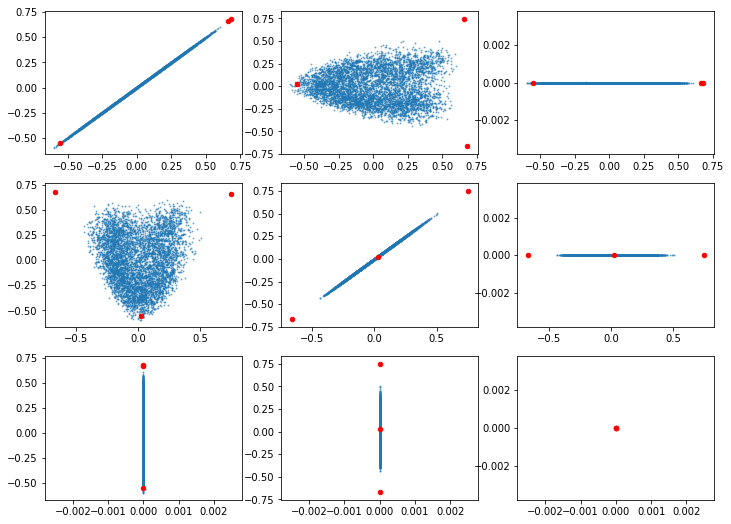

In [142]:
model.plot_at_pca(data)

In [143]:
dvec = model.dist_to_closest_at(data)

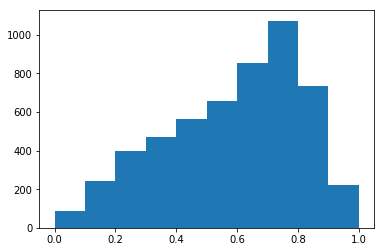

In [144]:
plt.hist(dvec, range=[0,1])
plt.show()

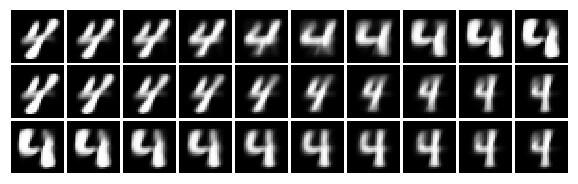

In [145]:
# at scan
samples_at = model.at_scan(10)
samples_x = model.at2data(samples_at)
AAtools.plot_mnist(samples_x, nc=10)

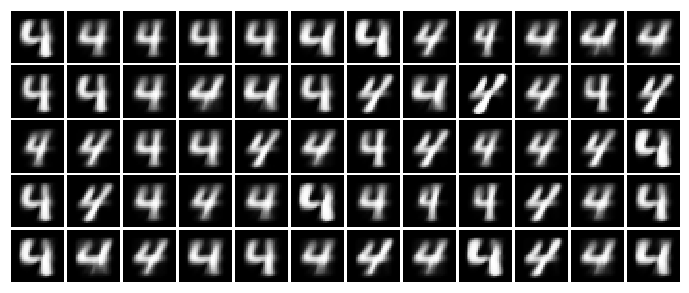

In [146]:
# sample from z uniform
samples_at = model.sample_at_uniform(60)
samples_x = model.at2data(samples_at)
AAtools.plot_mnist(samples_x, nc=12)

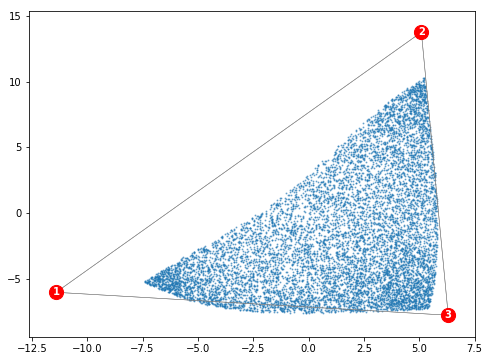

In [147]:
# sample from z uniform
samples_at = model.sample_at_uniform(10000)
samples_x = model.at2data(samples_at)
model.plot_at_mds(samples_x)

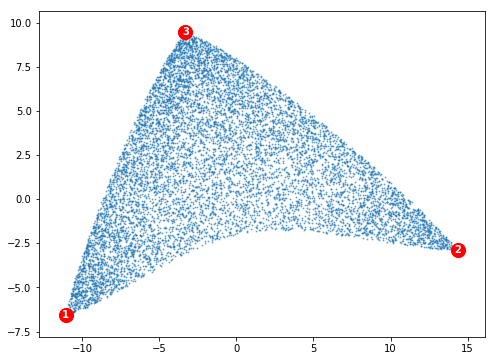

In [148]:
# sample from z uniform
samples_at = model.sample_at_uniform(10000)
samples_x = model.at2data(samples_at)
model.plot_pca_ats_data(samples_x)

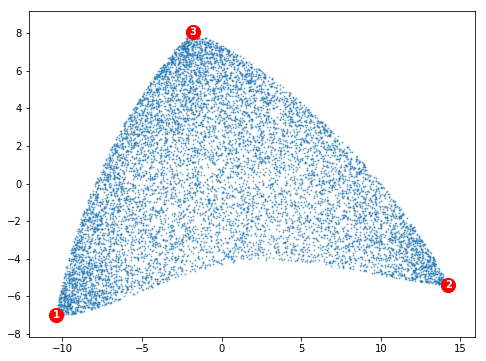

In [149]:
# sample from z uniform
samples_at = model.sample_at_uniform(10000)
samples_x = model.at2data(samples_at)
model.plot_pca_data_ats(samples_x)

In [155]:
# number of ATs vs loss
max_at = 10
reps = 5
loss_mat = np.zeros([reps,max_at-1])
mse_loss_mat = np.zeros([reps,max_at-1])
for idx_i,num_at in enumerate(range(2, max_at+1)):
    print('num_at: %d' % num_at)
    for idx_j in range(reps):
        enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
        model = AAnet.AAnet(enc_net, dec_net, rseed=np.int64(time.time()))
        model.train(data, batch_size=64, num_batches=5000, verbose=False)
        loss = model.compute_loss(data)
        mse_loss = model.compute_mse_loss(data)
        print(' rep: %d, loss: %.4f, mse_loss: %.4f' % (idx_j,loss,mse_loss))
        loss_mat[idx_j,idx_i] = loss
        mse_loss_mat[idx_j,idx_i] = mse_loss

num_at: 2
 rep: 0, loss: 0.1828, mse_loss: 0.1826
 rep: 1, loss: 0.1834, mse_loss: 0.1832
 rep: 2, loss: 0.1852, mse_loss: 0.1842
 rep: 3, loss: 0.1839, mse_loss: 0.1839
 rep: 4, loss: 0.1828, mse_loss: 0.1828
num_at: 3
 rep: 0, loss: 0.1699, mse_loss: 0.1694
 rep: 1, loss: 0.1877, mse_loss: 0.1758
 rep: 2, loss: 0.1685, mse_loss: 0.1655
 rep: 3, loss: 0.1660, mse_loss: 0.1651
 rep: 4, loss: 0.1688, mse_loss: 0.1677
num_at: 4
 rep: 0, loss: 0.1638, mse_loss: 0.1635
 rep: 1, loss: 0.1625, mse_loss: 0.1603
 rep: 2, loss: 0.1726, mse_loss: 0.1718
 rep: 3, loss: 0.1659, mse_loss: 0.1647
 rep: 4, loss: 0.1684, mse_loss: 0.1675
num_at: 5
 rep: 0, loss: 0.1597, mse_loss: 0.1565
 rep: 1, loss: 0.1729, mse_loss: 0.1694
 rep: 2, loss: 0.1751, mse_loss: 0.1583
 rep: 3, loss: 0.1708, mse_loss: 0.1653
 rep: 4, loss: 0.1636, mse_loss: 0.1623
num_at: 6
 rep: 0, loss: 0.2044, mse_loss: 0.1721
 rep: 1, loss: 0.1700, mse_loss: 0.1648
 rep: 2, loss: 0.2512, mse_loss: 0.1736
 rep: 3, loss: 0.2297, mse_los

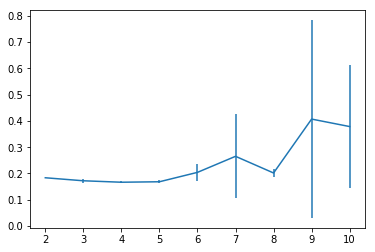

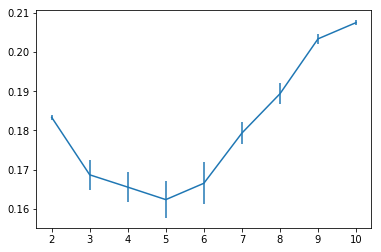

In [156]:
# plot num at vs loss
mu = np.mean(loss_mat, axis=0)
std = np.std(loss_mat, axis=0)
plt.errorbar(range(2, max_at+1), mu, std)
plt.show()
# plot num at vs mse loss
mu = np.mean(mse_loss_mat, axis=0)
std = np.std(mse_loss_mat, axis=0)
plt.errorbar(range(2, max_at+1), mu, std)
plt.show()